In [1]:
import os
import csv
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [69]:
# curr_dir = 'C:/Users/m294666/Documents/iezzi_data'
curr_dir = 'C:/Users/m294666/Documents/iezzi_data_10_10_23/Nevus_sample_images'

### Get number of images

In [70]:
# Function to count .jpg files in a directory and its subdirectories
def count_jpg_files(directory):
    jpg_count = 0
    
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(".jpg"):
                jpg_count += 1
                
    return jpg_count

main_folder = curr_dir

jpg_count = count_jpg_files(main_folder)
print(f"Number of .jpg files: {jpg_count}")

Number of .jpg files: 291


### Inspect an image

In [71]:
folder_no = 2
image_no = 1
sub_folders = os.listdir(curr_dir)
images = os.listdir(os.path.join(curr_dir,sub_folders[folder_no]))

# img_path = curr_dir+'/2693032/1.2.826.0.2.139953.1.2.50886.43962.34899.1393.jpg'
img_path = curr_dir+'/'+sub_folders[folder_no]+'/'+ images[image_no]
sub_folders

['10524631',
 '10617437',
 '12944653',
 '13013079',
 '2710264',
 '3420234',
 '3444046',
 '3448585',
 '4393598',
 '6005281',
 '7216345',
 '8401627',
 '9737827',
 '9878609',
 '9929298',
 'imagedata.json']

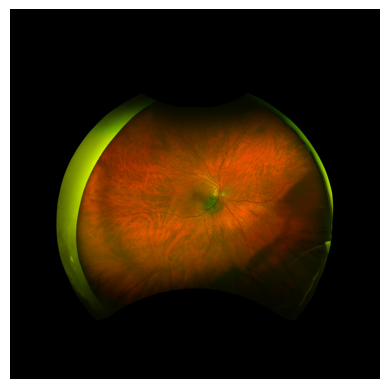

In [73]:
img = mpimg.imread(img_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

### Data Preparation - Batch 1

In [201]:
data1 = pd.read_excel('C:/Users/m294666/Documents/iezzi_data/Nevus_sample_annotations_09-20-2023.xlsx')
data2 = pd.read_excel('C:/Users/m294666/Documents/iezzi_data_10_10_23/Nevus_sample_summary.xlsx')

In [202]:
data1.head()

,MRN,Last Name,First Name,Date of Birth,DFS,Race,Sex,Smoking status,History of cutaneous melanoma,Autoimmune disease,...,educ_level_num,educ_level,add_line_1,add_line_2,city,state_province,country,zip,home_phone,email_address
0,2693032,Vogel,Margaret,1947-01-19,2020-05-14,White,Female,Never,False,False,...,18.0,"MASTER'S DEGREE (E.G., MA, MS, MENG, MED...",3504 Fairway Ridge Ln SW Apt 116,NaN,Rochester,MINNESOTA,USA,55902,507-206-0749,margaretvogel414@gmail.com
1,3076201,Louters,Barbara,1930-03-28,2022-05-17,White,Female,Never,False,False,...,16.0,ASSOCIATE DEGREE: ACADEMIC PROGRAM,PO Box 34,NaN,Hollandale,MINNESOTA,USA,56045,507-383-1608,Bfbrouwer@hotmail.com
2,3171679,Huntley,Verlys,1934-11-27,2020-09-21,White,Female,Never,True,False,...,12.0,12TH GRADE,10516 720th Ave,NaN,Emmons,MINNESOTA,USA,56029,507-297-5546,vhuntley@wctatel.net
3,3198755,Castronvinci,Kathleen,1952-05-31,2022-02-16,White,Female,Never,False,False,...,16.0,ASSOCIATE DEGREE: ACADEMIC PROGRAM,8480 Franlo Rd Apt 507,NaN,Eden Prairie,MINNESOTA,USA,55344,507-398-6894,kle1952@yahoo.com
4,4079944,Pell,Gene,1949-12-31,2020-02-11,White,Male,Never,False,False,...,12.0,12TH GRADE,15099 505th Ave,NaN,Austin,MINNESOTA,USA,55912,507-437-3093,pellco@live.com


In [127]:
data1['Date of Birth'] = pd.to_datetime(data1['Date of Birth'])
data1['DFS'] = pd.to_datetime(data1['DFS'])

# Calculate the age by subtracting 'birthdate' from 'date_first_seen' and divide by 365 days to get years
data1['age'] = ((data1['DFS'] - data1['Date of Birth']).dt.days / 365).astype('int32')

In [128]:
data1.head()

,MRN,Last Name,First Name,Date of Birth,DFS,Race,Sex,Smoking status,History of cutaneous melanoma,Autoimmune disease,...,educ_level,add_line_1,add_line_2,city,state_province,country,zip,home_phone,email_address,age
0,2693032,Vogel,Margaret,1947-01-19,2020-05-14,White,Female,Never,False,False,...,"MASTER'S DEGREE (E.G., MA, MS, MENG, MED...",3504 Fairway Ridge Ln SW Apt 116,NaN,Rochester,MINNESOTA,USA,55902,507-206-0749,margaretvogel414@gmail.com,73
1,3076201,Louters,Barbara,1930-03-28,2022-05-17,White,Female,Never,False,False,...,ASSOCIATE DEGREE: ACADEMIC PROGRAM,PO Box 34,NaN,Hollandale,MINNESOTA,USA,56045,507-383-1608,Bfbrouwer@hotmail.com,92
2,3171679,Huntley,Verlys,1934-11-27,2020-09-21,White,Female,Never,True,False,...,12TH GRADE,10516 720th Ave,NaN,Emmons,MINNESOTA,USA,56029,507-297-5546,vhuntley@wctatel.net,85
3,3198755,Castronvinci,Kathleen,1952-05-31,2022-02-16,White,Female,Never,False,False,...,ASSOCIATE DEGREE: ACADEMIC PROGRAM,8480 Franlo Rd Apt 507,NaN,Eden Prairie,MINNESOTA,USA,55344,507-398-6894,kle1952@yahoo.com,69
4,4079944,Pell,Gene,1949-12-31,2020-02-11,White,Male,Never,False,False,...,12TH GRADE,15099 505th Ave,NaN,Austin,MINNESOTA,USA,55912,507-437-3093,pellco@live.com,70


In [186]:
print(f'Data shape: {data1.shape}')

Data shape: (15, 62)


In [203]:
data1_cols_new = pd.read_excel('C:/Users/m294666/Documents/iezzi_data/230929_Ch_Nevus_deleted_items_to_ignore.xlsx')

data1_cols_new = list(data1_cols_new.columns)

data1_cols_old = list(data1.columns)

# columns_to_del = [
#     'Last Name','First Name','History of cutaneous melanoma','Autoimmune disease','Vitiligo',''
# ]
len(data1_cols_new)

62

In [204]:
cols_to_remove = [item for item in data1_cols_new + data1_cols_old if item not in data1_cols_new or item not in data1_cols_old]

In [205]:
cols_to_remove

['Last Name',
 'First Name',
 'Smoking status',
 'History of cutaneous melanoma',
 'Autoimmune disease',
 'Vitiligo',
 'History of renal cell carcinoma',
 'History of mesothelioma',
 'History of cancer',
 'Type of cancer',
 'Family history of cancer',
 'Family hx ch mm',
 'Family hx cutaneous mm',
 'Family history renal cell',
 'Family history mesothelioma',
 'Family history other cancer',
 'Welder occupation',
 'OD Retinal invasion',
 'OD RPE invasion',
 'OD Sentinel vessel',
 'OS Retinal invasion',
 'OS RPE invasion',
 'OS Sentinel vessel',
 'OCTA done',
 'Good photos',
 'Additional diagnosis',
 'iop_age',
 'iop_visit_mean_od',
 'iop_visit_mean_os',
 'va_dist_best_age',
 'vaod_dist_best_snellen',
 'vaod_dist_best_logmar',
 'vaos_dist_best_snellen',
 'vaos_dist_best_logmar',
 'pat_name',
 'birth_date',
 'sex',
 'gender',
 'race',
 'ethnicity',
 'educ_level_num',
 'educ_level',
 'add_line_1',
 'add_line_2',
 'city',
 'state_province',
 'country',
 'zip',
 'home_phone',
 'email_address'

In [206]:
data1 = data1.drop(columns = cols_to_remove)
data1.head()

,MRN,Date of Birth,DFS,Race,Sex,Melanocytosis,Germline Bap1,Affected Eye,OD VA at DFS (Snellen),OD VA at DFS (logMAR),...,OS Orange pigment,OS CNVM,OS CB involvement,OS Iris involvement,OS Extraocular extension,OS RPE trough,OS Internal reflectivity,OS Cytology,OS Prior treatment,OS Date prior treatment
0,2693032,1947-01-19,2020-05-14,White,Female,False,False,Right,20/20,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
1,3076201,1930-03-28,2022-05-17,White,Female,False,False,Left,NaN,NaN,...,False,False,False,False,False,False,High,NaN,NaN,NaN
2,3171679,1934-11-27,2020-09-21,White,Female,False,False,Right,20/60,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
3,3198755,1952-05-31,2022-02-16,White,Female,False,False,Left,NaN,NaN,...,False,False,False,False,False,False,High,NaN,NaN,NaN
4,4079944,1949-12-31,2020-02-11,White,Male,False,False,Both,20/20,NaN,...,False,False,False,False,False,False,Medium,NaN,NaN,NaN


In [207]:
def get_row(row):

    row = row.reset_index()

    # Create a new DataFrame using the first column as column names
    new_dataframe = pd.DataFrame(columns=row.iloc[:, 0])

    # Add the second column as the first row in the new DataFrame
    new_dataframe.loc[0] = row.iloc[:, 1].tolist()

    return new_dataframe

new_data1 = pd.DataFrame(columns=data1.columns)

# Iterate through the rows of the original DataFrame
for index, row in data1.iterrows():
    
    row_pd = get_row(row)
    
    if row['Affected Eye'] == 'Both':
        
        # Create a duplicate row with 'Left'
        left_row = row_pd.copy()
        left_row['Affected Eye'] = 'Left'

        # Create a duplicate row with 'Right'
        right_row = row_pd.copy()
        right_row['Affected Eye'] = 'Right'

        # Append both duplicate rows to the new DataFrame
        new_data1 = pd.concat([new_data1,left_row, right_row], axis=0, ignore_index=True)
    else:
        row_normal = row_pd.copy()
#         If 'Affected Eye' is not 'Both', simply add the row to the new DataFrame
        new_data1 = pd.concat([new_data1,row_normal], axis=0, ignore_index=True)

# The new_df DataFrame now contains the desired changes.
new_data1

C:\Users\m294666\AppData\Local\Temp\ipykernel_13168\506383602.py:35: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  new_data1 = pd.concat([new_data1,row_normal], axis=0, ignore_index=True)
C:\Users\m294666\AppData\Local\Temp\ipykernel_13168\506383602.py:35: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  new_data1 = pd.concat([new_data1,row_normal], axis=0, ignore_index=True)
C:\Users\m294666\AppData\Local\Temp\ipykernel_13168\506383602.py:35: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  new_data1 = pd.concat([new_data1,row_normal], axis=0, ignore_index=True)
C:\Users\m294666\AppData\Local\Temp\ipykernel_131

,MRN,Date of Birth,DFS,Race,Sex,Melanocytosis,Germline Bap1,Affected Eye,OD VA at DFS (Snellen),OD VA at DFS (logMAR),...,OS Orange pigment,OS CNVM,OS CB involvement,OS Iris involvement,OS Extraocular extension,OS RPE trough,OS Internal reflectivity,OS Cytology,OS Prior treatment,OS Date prior treatment
0,2693032,1947-01-19,2020-05-14,White,Female,False,False,Right,20/20,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
1,3076201,1930-03-28,2022-05-17,White,Female,False,False,Left,NaN,NaN,...,False,False,False,False,False,False,High,NaN,NaN,NaN
2,3171679,1934-11-27,2020-09-21,White,Female,False,False,Right,20/60,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
3,3198755,1952-05-31,2022-02-16,White,Female,False,False,Left,NaN,NaN,...,False,False,False,False,False,False,High,NaN,NaN,NaN
4,4079944,1949-12-31,2020-02-11,White,Male,False,False,Left,20/20,NaN,...,False,False,False,False,False,False,Medium,NaN,NaN,NaN
5,4079944,1949-12-31,2020-02-11,White,Male,False,False,Right,20/20,NaN,...,False,False,False,False,False,False,Medium,NaN,NaN,NaN
6,4328976,1951-09-08,2021-10-19,White,Male,False,False,Left,NaN,NaN,...,False,False,False,False,False,False,High,NaN,NaN,NaN
7,5233583,1937-04-23,2023-05-04,White,Female,False,False,Right,20/25,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
8,6206368,1949-02-24,2020-10-22,White,Female,False,False,Left,NaN,NaN,...,False,False,False,False,False,False,Medium,NaN,NaN,NaN
9,7360758,2012-12-21,2021-01-20,White,Male,False,False,Right,20/40,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN


In [194]:
for index,row in new_data1.iterrows():
    row_pd = get_row(row)
    break
row_pd.columns
od_columns = [col for col in row_pd.columns if col.startswith('OD')]

od_columns

cleaned_columns = [col.replace('OD ', '') for col in od_columns]

['OD VA at DFS (Snellen)',
 'OD VA at DFS (logMAR)',
 'OD IOP at DFS',
 'OD Largest tumor quadrant',
 'OD Largest tumor posterior margin',
 'OD Largest tumor anterior margin',
 'OD Largest tumor diameter (mm)',
 'OD Largest tumor thickness (mm)',
 'OD Distance to ON (mm)',
 'OD Distance to fov (mm)',
 'OD Tumor shape',
 "OD Bruch's rupture",
 'OD Color',
 'OD SRF Extent',
 'OD Halo',
 'OD SRF in fov',
 'OD Drusen',
 'OD Orange pigment',
 'OD CNVM',
 'OD CB involvement',
 'OD Iris involvement',
 'OD Extraocular extension',
 'OD RPE trough',
 'OD Internal reflectivity',
 'OD Cytology',
 'OD Prior treatment',
 'OD Date prior treatment']

In [195]:
data1.columns

Index(['MRN', 'Date of Birth', 'DFS', 'Race', 'Sex', 'Melanocytosis',
       'Germline Bap1', 'Affected Eye', 'OD VA at DFS (Snellen)',
       'OD VA at DFS (logMAR)', 'OD IOP at DFS', 'OD Largest tumor quadrant',
       'OD Largest tumor posterior margin', 'OD Largest tumor anterior margin',
       'OD Largest tumor diameter (mm)', 'OD Largest tumor thickness (mm)',
       'OD Distance to ON (mm)', 'OD Distance to fov (mm)', 'OD Tumor shape',
       'OD Bruch's rupture', 'OD Color', 'OD SRF Extent', 'OD Halo',
       'OD SRF in fov', 'OD Drusen', 'OD Orange pigment', 'OD CNVM',
       'OD CB involvement', 'OD Iris involvement', 'OD Extraocular extension',
       'OD RPE trough', 'OD Internal reflectivity', 'OD Cytology',
       'OD Prior treatment', 'OD Date prior treatment',
       'OS VA at DFS (Snellen)', 'OS VA at DFS (logMAR)', 'OS IOP at DFS',
       'OS Largest tumor quadrant', 'OS Largest tumor posterior margin',
       'OS Largest tumor anterior margin', 'OS Largest tumor dia

In [200]:
data2.columns

Index(['pat_mrn', 'exam_date', 'iop_date', 'iop_age', 'iop_visit_mean_od',
       'iop_visit_mean_os', 'comment', 'va_dist_best_date', 'va_dist_best_age',
       'va_dist_best_line', 'vaod_dist_best_snellen', 'vaod_dist_best_logmar',
       'vaos_dist_best_snellen', 'vaos_dist_best_logmar',
       'vaou_dist_best_snellen', 'epic_id', 'pat_name', 'birth_date', 'sex',
       'gender', 'race', 'ethnicity', 'educ_level_num', 'educ_level',
       'add_line_1', 'add_line_2', 'city', 'state_province', 'country', 'zip',
       'home_phone', 'email_address'],
      dtype='object')

# Training pipeline for nevus detector

#### utils.py

In [52]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
# from dataloader import CustomDataset
import torch.nn as nn
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

def transform(image, image_size=224):
    """
    Preprocess and transform the input image.
    
    Args:
        image (PIL Image): The input image.
        image_size (int): Size to which the image is resized.
        
    Returns:
        torch.Tensor: Transformed image tensor.
    """
    preprocess = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
    ])
    
    return preprocess(image)

def create_train_val_test_loaders(csv_file, batch_size, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, image_size=224):
    """
    Create train, validation, and test data loaders based on provided ratios.

    Args:
        csv_file (str): Path to the csv file.
        batch_size (int): Number of samples in each batch.
        train_ratio (float): Ratio of training data.
        val_ratio (float): Ratio of validation data.
        test_ratio (float): Ratio of test data.
        image_size (int): Size to which the image is resized.

    Returns:
        train_loader, val_loader, test_loader: DataLoader instances for train, validation, and test datasets.
    """
    dataset = CustomDataset(csv_file, image_size=image_size)
    
    # Calculate data split sizes
    total_samples = len(dataset)
    train_size = int(train_ratio * total_samples)
    val_size = int(val_ratio * total_samples)
    test_size = total_samples - train_size - val_size
    
    # Split the dataset into train, validation, and test sets
    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
    
    # Create DataLoader instances for train, validation, and test datasets
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, val_loader, test_loader

def evaluate(model, dataloader, criterion, device):
    """
    Evaluate a model using a DataLoader.

    Args:
        model: The binary classification model.
        dataloader: DataLoader for validation or test data.
        criterion: Loss function (e.g., BCEWithLogitsLoss).
        device: The device on which to perform the evaluation (e.g., "cuda" or "cpu").

    Returns:
        loss: The average loss over the data.
        accuracy: The accuracy of the model on the data.
        gt_labels: The ground truth labels of the data.
        predicted_labels: List of predicted labels (0 or 1) for the data.
        image_paths: List of file paths for the data.
    """
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    gt_labels = []
    predicted_labels = []
    image_paths = []

    with torch.no_grad():
        for images, labels, paths in dataloader:
            gt_labels.extend(labels.tolist())
            images, labels = images.to(device), labels.reshape((-1,1)).to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            predicted_labels.extend(predicted.cpu().numpy())
            image_paths.extend(paths)

    loss = total_loss / len(dataloader)
    accuracy = correct / total

    return loss, accuracy, gt_labels, predicted_labels, image_paths

def calculate_auroc(labels, predicted_labels):
    """
    Calculate the Area Under the Receiver Operating Characteristic (AUROC) score.

    Args:
        labels: Ground truth labels (0 or 1).
        predicted_labels: Predicted labels (0 or 1) from the model.

    Returns:
        auroc: AUROC score.
    """
    auroc = roc_auc_score(labels, predicted_labels)
    return auroc

def plot_and_save_losses_accuracies(train_losses, val_losses, train_accuracies, val_accuracies, save_dir):
    """
    Plot train and validation losses and accuracies and save the plots.

    Args:
        train_losses (list): List of training losses.
        val_losses (list): List of validation losses.
        train_accuracies (list): List of training accuracies.
        val_accuracies (list): List of validation accuracies.
        save_dir (str): Directory to save the plots.
    """
    plt.figure(figsize=(12, 5))
    
    x = list(range(1, len(train_losses) + 1))

    # Plot Losses
    plt.subplot(1, 2, 1)
    plt.plot(x,train_losses, label='Training Loss')
    plt.plot(x,val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Losses')

    # Plot Accuracies
    plt.subplot(1, 2, 2)
    plt.plot(x,train_accuracies, label='Training Accuracy')
    plt.plot(x,val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracies')

    # Save the plots
    save_path = f"{save_dir}/losses_accuracies_plot.png"
    plt.savefig(save_path)
    print(f"Losses and accuracies plot saved at {save_path}")

#### dataloader.py

In [13]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from PIL import Image
# from utils import transform

class CustomDataset(Dataset):
    def __init__(self, csv_file, image_size=224):
        """
        Custom dataset for loading images and labels from an Excel file.

        Args:
            csv_file (str): Path to the csv file containing image paths and labels.
            image_size (int): Size to which the image is resized.
        """
        self.data = pd.read_csv(csv_file)
        self.image_size = image_size
        self.file_paths = self.data.iloc[:, 0].values
        self.labels = self.data.iloc[:, 1].values
        self.targets = self.labels.tolist()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data.iloc[idx]
        image = Image.open(img_path)  # Load image using the file path
        image = transform(image, self.image_size)
        label = torch.tensor(label, dtype=torch.float32)

        return image, label, img_path

#### model.py

In [48]:
import torch
import torch.nn as nn
import torchvision.models as models

class CustomResNet18(nn.Module):
    def __init__(self, num_outputs=2, pretrained=None):
        super(CustomResNet18, self).__init__()

        # Load the pre-trained ResNet-18 model if a path is provided, or create a new one
        if pretrained is not None:
            self.model = models.resnet18()
            self.model.load_state_dict(torch.load(pretrained))
        else:
            self.model = models.resnet18(weights='IMAGENET1K_V1')

        # Modify the final FC layer
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_outputs)

    def forward(self, x):
        return self.model(x)

def freeze_layers(model, layer_names_to_freeze):
    for name, param in model.named_parameters():
        if any(name.startswith(layer_name) for layer_name in layer_names_to_freeze):
            param.requires_grad = False

def print_trainable_layers(model):
    print("Trainable Layers:")
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(name)
            
def get_model(num_outputs=1, pretrained=None, layer_names_to_freeze=[]):
    model = CustomResNet18(num_outputs)
    freeze_layers(model, layer_names_to_freeze)
#     print_trainable_layers(model)
    return model

#### train_test.py

labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
Epoch [1/1] - Train Loss: 0.7171 - Train Accuracy: 0.6500 - Validation Loss: 2.6322 - Validation Accuracy: 0.4750
Test AUROC: 0.4544 - Batch Size: 32, Learning Rate: 0.001
Losses and accuracies plot saved at C:/Users/m294666/Documents/yoga-lab/nevus_detector/plots/losses_accuracies_plot.png


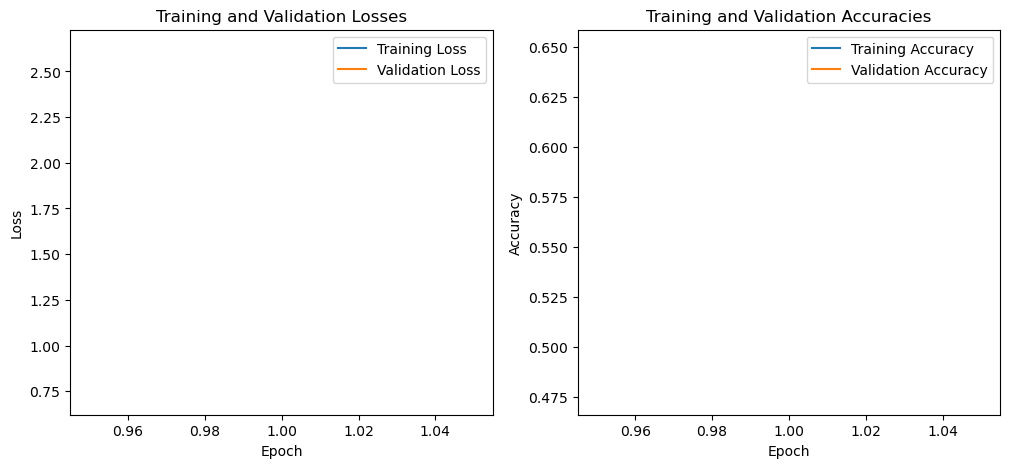

In [55]:
import torch
import datetime
import torch.nn as nn
import torch.optim as optim
# from dataloader import create_train_val_test_loaders
# from model import get_model
# from utils import transform

def train(model, train_loader, val_loader, test_loader, num_epochs, learning_rate, batch_size):
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    best_val_loss = float("inf")
    best_model = None
    train_losses, train_accuracies, val_losses, val_accuracies = [], [], [], []
    test_image_paths, test_predicted_labels = [], []

    for epoch in range(num_epochs):
        
        model.train()
        total_loss = 0
        correct_train = 0
        total_train = 0

        for images, labels, _ in train_loader:
            
            images, labels = images.to(device), labels.reshape((-1,1)).to(device)
            optimizer.zero_grad()
            outputs = model(images)
            print(f'labels: {labels.size()}, preds: {outputs.size()}')
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        train_loss = total_loss / len(train_loader)
        train_accuracy = correct_train / total_train

        # Validation
        val_loss, val_accuracy, _, _, _ = evaluate(model, val_loader, criterion, device)

        print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {train_loss:.4f} - Train Accuracy: {train_accuracy:.4f} - Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_accuracy:.4f}")

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model.state_dict()

    # Testing
    model.load_state_dict(best_model)
    model.eval()

    test_loss, _, test_gt_labels, test_predicted_labels, test_image_paths = evaluate(model, test_loader, criterion, device)
    auroc = calculate_auroc(test_gt_labels, test_predicted_labels)
    print(f"Test AUROC: {auroc:.4f} - Batch Size: {batch_size}, Learning Rate: {learning_rate}")

    return best_model, train_losses, train_accuracies, val_losses, val_accuracies, test_image_paths, test_predicted_labels

def main():
    
    # Setting the environment variable to store pretrained model
    os.environ['TORCH_HOME'] = 'C:/Users/m294666/Documents/base_models'
    
    csv_file = 'C:/Users/m294666/Documents/nevus_labels.csv'
    best_model_path = 'C:/Users/m294666/Documents/yoga-lab/nevus_detector/best_models'
    batch_size = 32
    num_epochs = 1
    learning_rate = 0.001

    train_loader, val_loader, test_loader = create_train_val_test_loaders(csv_file, batch_size)

    model = get_model()
    best_model_weights, train_losses, train_accuracies, val_losses, val_accuracies, test_image_paths, test_predicted_labels = train(model, train_loader, val_loader, test_loader, num_epochs, learning_rate, batch_size)

    # Save the trained model weights to a file
    now = datetime.datetime.now()
    date_time_str = now.strftime("/best_model_weights_%m_%d_%y_%H_%M.pth")
    best_model_path += date_time_str
    torch.save(best_model_weights, best_model_path)
    
    # Plot and save train/val losses and accuracies
    plot_save_directory = 'C:/Users/m294666/Documents/yoga-lab/nevus_detector/plots'
    plot_and_save_losses_accuracies(train_losses, val_losses, train_accuracies, val_accuracies, plot_save_directory)

if __name__ == "__main__":
    main()

# Create labels csv

In [12]:
import os
import csv

# Define the main directory where your images are stored
main_directory = 'C:/Users/m294666/Documents/nevus_data'

# Define the output CSV file name
csv_file = 'C:/Users/m294666/Documents/nevus_labels.csv'

# Function to extract the label from the image filename
def extract_label(filename):
    if filename[-6:] == '_0.jpg':
        return 0
    elif filename[-6:] == '_1.jpg':
        return 1
    else:
        return None

# Initialize a list to store image paths and labels
image_data = []
                
# Recursively search for JPG images in subdirectories
for root, _, files in os.walk(main_directory):
    for file in files:
        if file.lower().endswith('.jpg'):
            image_path = os.path.join(root, file)
            label = extract_label(file)
            if label is not None:
                image_data.append((image_path, label))

# Write the data to a CSV file
with open(csv_file, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    
    # Write header row
    csv_writer.writerow(['Image Path', 'Label'])
    
    # Write image paths and labels
    for path, label in image_data:
        csv_writer.writerow([path, label])

print(f"CSV file '{csv_file}' has been created with image paths and labels.")

CSV file 'C:/Users/m294666/Documents/nevus_labels.csv' has been created with image paths and labels.


In [16]:
csv_file_path = 'C:/Users/m294666/Documents/nevus_labels.csv'
df = pd.read_csv(csv_file_path)
df.head()

,Image Path,Label
0,C:/Users/m294666/Documents/nevus_data\09_20_23...,0
1,C:/Users/m294666/Documents/nevus_data\09_20_23...,1
2,C:/Users/m294666/Documents/nevus_data\09_20_23...,0
3,C:/Users/m294666/Documents/nevus_data\09_20_23...,0
4,C:/Users/m294666/Documents/nevus_data\09_20_23...,0


In [28]:
# Count the number of each label in the "Label" column
label_counts = df['Label'].value_counts()

# Calculate the percentage of each label
label_percentages = label_counts / len(df) * 100

# Print the count and percentage of each label
for label, count in label_counts.items():
    percentage = label_percentages[label]
    print(f"Label {label}: Count = {count}, Percentage = {percentage:.2f}%")

Label 0: Count = 264, Percentage = 66.00%
Label 1: Count = 136, Percentage = 34.00%


### Output predictions

In [18]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt

def create_subplot(test_image_paths, test_predicted_labels, csv_file_path, save_dir):
    # Read the CSV file and create a DataFrame
    df = pd.read_csv(csv_file_path)
        
    # Obtain the ground truth labels associated with test_image_paths
    ground_truth_labels = []
    for image_path in test_image_paths:
        row = df[df['Image Path'] == image_path]
        if not row.empty:
            ground_truth_labels.append(row['Label'].values[0])
    
    # Randomly choose 16 images
    random.seed(42)  # Set a seed for reproducibility
    selected_indices = random.sample(range(len(test_image_paths)), 8)
    
    # Create a 2x4 subplot
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
#     fig.subplots_adjust(wspace=0.5, hspace=0.5)
    
    # Loop through selected images and plot them
    for i, index in enumerate(selected_indices):
        image_path = test_image_paths[index]
        predicted_label = test_predicted_labels[index]
        ground_truth_label = ground_truth_labels[index]
        ax = axes[i // 4, i % 4]
        ax.axis('off')
        ax.set_title(f'Prediction: {predicted_label}', color='green' if predicted_label == ground_truth_label else 'red')
        img = plt.imread(image_path)
        ax.imshow(img)
    
    # Save the subplot to the specified directory
    save_path = save_dir + "preds_plot.png"
    fig.tight_layout()
    plt.savefig(save_path)
    plt.close()
    print(f'Preds plot saved to {save_path}')

# Example usage:
test_image_paths = [r"C:/Users/m294666/Documents/nevus_data\09_20_23\10544859\1.2.826.0.2.139953.1.2.50886.44751.36132.10_0.jpg",
                    r"C:/Users/m294666/Documents/nevus_data\09_20_23\10544859\1.2.826.0.2.139953.1.2.50886.44751.36132.12_1.jpg",
                    r"C:/Users/m294666/Documents/nevus_data\09_20_23\10544859\1.2.826.0.2.139953.1.2.50886.44751.36132.14_0.jpg",
                    r'C:/Users/m294666/Documents/nevus_data\09_20_23\10544859\1.2.826.0.2.139953.1.2.50886.44751.36132.15_0.jpg',
                    r'C:/Users/m294666/Documents/nevus_data\09_20_23\10544859\1.2.826.0.2.139953.1.2.50886.44751.36132.16_0.jpg',
                    r'C:/Users/m294666/Documents/nevus_data\09_20_23\10544859\1.2.826.0.2.139953.1.2.50886.44751.36132.1_0.jpg',
                    r'C:/Users/m294666/Documents/nevus_data\09_20_23\10544859\1.2.826.0.2.139953.1.2.50886.44751.36132.2_0.jpg',
                    r'C:/Users/m294666/Documents/nevus_data\09_20_23\10544859\1.2.826.0.2.139953.1.2.50886.44751.36132.4_0.jpg']
test_predicted_labels = [1,0,0,1,1,0,1,0]
csv_file_path = 'C:/Users/m294666/Documents/nevus_labels.csv'
save_dir = 'C:/Users/m294666/Documents/'
create_subplot(test_image_paths, test_predicted_labels, csv_file_path, save_dir)

Preds plot saved to C:/Users/m294666/Documents/preds_plot.png


### Grad-CAM

#### config

In [14]:
import argparse

def parse_arguments():
    parser = argparse.ArgumentParser(description="Training and validating a nevus detector model.")

    parser.add_argument('--main_dir', default='C:/Users/m294666/Documents/', type=str,
                        help="The main directory")

    # main_dir = 'C:/Users/m294666/Documents/'
    # main_dir = '/research/labs/ophthalmology/iezzi/m294666/'

    parser.add_argument(
        '--pretrained_dir',
        default='/research/labs/ophthalmology/iezzi/m294666/pretrained_models/resnet_pretrained_weights_distorted.pth',
        type=str,
        help="The directory for the pretrained model")

    parser.add_argument('--batch_size', default=[16,32,64],
                        help="Batch size (default: 32)")

    parser.add_argument('--num_epochs', default=50, type=int,
                        help="Number of epochs (default: 1)")

    parser.add_argument('--learning_rate', default=[0.0001,0.001,0.01,0.1],
                        help="Learning rate (default: 0.001)")

    args = parser.parse_args()
    return args

args = parse_arguments()

usage: ipykernel_launcher.py [-h] [--main_dir MAIN_DIR] [--pretrained_dir PRETRAINED_DIR] [--batch_size BATCH_SIZE] [--num_epochs NUM_EPOCHS]
                             [--learning_rate LEARNING_RATE]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\m294666\AppData\Roaming\jupyter\runtime\kernel-55b75616-cc5f-4024-85ff-c30619af5c8a.json


SystemExit: 2

#### dataloader

In [45]:
import torch
import pandas as pd
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image

def transform(image, image_size=224):
    preprocess = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
    ])
    
    return preprocess(image)

class CustomDataset(Dataset):
    def __init__(self, csv_file, image_size=224):
        self.data = pd.read_csv(csv_file)
        self.image_size = image_size
        self.file_paths = self.data.iloc[:, 0].values
        self.labels = self.data.iloc[:, 1].values
        self.targets = self.labels.tolist()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data.iloc[idx]
        image = Image.open(img_path)  # Load image using the file path
        image = transform(image, self.image_size)
        label = torch.tensor(label, dtype=torch.float32)

        return image, label, img_path

#### model

In [168]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import models
from skimage.io import imread
from skimage.transform import resize

class CustomResNet18(nn.Module):
    def __init__(self, num_outputs=2, pretrained=None):
        super(CustomResNet18, self).__init__()
        
        self.gradients = None
        self.tensorhook = []
        self.layerhook = []
        self.selected_out = None

        # Load the pre-trained ResNet-18 model if a path is provided, or create a new one
        if pretrained is not None:
            self.model = models.resnet18()
            self.model.load_state_dict(torch.load(pretrained))
        else:
            self.model = models.resnet18(weights='IMAGENET1K_V1')
            
        self.layerhook.append(self.model.layer4.register_forward_hook(self.forward_hook()))
        
        for p in self.model.parameters():
            p.requires_grad = True

        # Modify the final FC layer
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_outputs)
        
    def activations_hook(self,grad):
        self.gradients = grad

    def get_act_grads(self):
        return self.gradients

    def forward_hook(self):
        def hook(module, inp, out):
            self.selected_out = out
            self.tensorhook.append(out.register_hook(self.activations_hook))
        return hook

    def forward(self, x):
        out = self.model(x)
        return out, self.selected_out

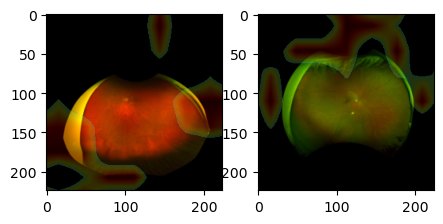

In [298]:
model = CustomResNet18()

images_gradcam = []
labels_gradcam = []
preds_gradcam = []

# Create dataloaders
csv_file = main_dir + 'nevus_labels.csv'
_, _, test_loader = create_train_val_test_loaders(csv_file, 1)

fig,ax = plt.subplots(1,2,figsize=(5,5))

for itr,(img,label,_) in enumerate(test_loader):
    
    if itr == 2:
        break
    
    out, acts = model(img)
    acts = acts.detach()
    
    predicted_label = torch.argmax(out, dim=1)

    loss = nn.CrossEntropyLoss()(out,label.long())
    loss.backward()

    grads = model.get_act_grads().detach()

    pooled_grads = torch.mean(grads, dim=[0,2,3]).detach()

    for i in range(acts.shape[1]):
        acts[:,i,:,:] *= pooled_grads[i]

    heatmap_j = torch.mean(acts, dim = 1).squeeze()
    heatmap_j_max = heatmap_j.max(axis = 0)[0]
    heatmap_j /= heatmap_j_max

    heatmap_j = torch.where(heatmap_j > 0.5, heatmap_j, torch.zeros_like(heatmap_j)).detach().numpy()
    heatmap_j = resize(heatmap_j,(224,224),preserve_range=True)

    # Set your threshold value (adjust as needed)
    threshold = 0.5

    # Create a mask for values greater than the threshold
    mask = heatmap_j > threshold
    alpha = mask.astype(float)

    # Apply the mask to the heatmap
    result_heatmap = np.copy(heatmap_j)
    result_heatmap[~mask] = 0

    # Overlay the adjusted heatmap on the image
    combined = img[0].numpy().transpose((1,2,0)).copy()
    combined = combined[:, :, :3]

    # Display the result
    ax[itr].imshow(combined)
    ax[itr].imshow(result_heatmap, cmap='jet', alpha=0.2*alpha)  # Use alpha to control the transparency

plt.show()

#### utils

In [41]:
import random
import pandas as pd
from torch.utils.data import DataLoader, random_split
# from dataloader import CustomDataset
# from model import CustomResNet18
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def get_model(num_outputs=2, pretrained=None, layer_names_to_freeze=[]):
    model = CustomResNet18(num_outputs)
    freeze_layers(model, layer_names_to_freeze)
#     print_trainable_layers(model)
    return model

def create_train_val_test_loaders(csv_file, batch_size, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2, image_size=224):
    dataset = CustomDataset(csv_file, image_size=image_size)
    
    # Calculate data split sizes
    total_samples = len(dataset)
    train_size = int(train_ratio * total_samples)
    val_size = int(val_ratio * total_samples)
    test_size = total_samples - train_size - val_size
    
    # Split the dataset into train, validation, and test sets
    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
    
    # Create DataLoader instances for train, validation, and test datasets
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, val_loader, test_loader

def freeze_layers(model, layer_names_to_freeze):
    for name, param in model.named_parameters():
        if any(name.startswith(layer_name) for layer_name in layer_names_to_freeze):
            param.requires_grad = False

def print_trainable_layers(model):
    print("Trainable Layers:")
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(name)

#### gradcam

In [42]:
import os
import torch
import torchvision
import datetime
from torchvision import models, transforms
from torch.nn import functional as F
import matplotlib.pyplot as plt
import numpy as np
import random

# from config import parse_arguments
# from utils import get_model, create_train_val_test_loaders

# Create a function to generate Grad-CAM
def generate_gradcam(model, img, target_layer, threshold):
    # Forward pass
    output = model(img)
    model.zero_grad()
    
    # Calculate the gradient of the output with respect to the target layer
    output.backward(gradient=torch.ones_like(output))

    # Get the gradients at the target layer
    grads = target_layer.weight.grad

    # Global average pooling
    pooled_grads = F.adaptive_avg_pool2d(grads, (1, 1))
    
    # Get the activation map from the target layer
    activation_map = target_layer(img)
    
    for i in range(activation_map.size(1)):
        activation_map[:, i, :, :] *= pooled_grads[:, i, :, :]

    heatmap = activation_map.mean(dim=1, keepdim=True)
    
    heatmap = F.relu(heatmap)

    # Apply thresholding
    heatmap = torch.where(heatmap > threshold, heatmap, torch.zeros_like(heatmap))

    return heatmap

# Define a function to plot images with Grad-CAM
def plot_gradcam(images, heatmap, predictions, labels, file_name):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))

    for i in range(4):
        for j in range(4):
            idx = random.randint(0, len(images) - 1)
            image = images[idx]
            ax = axes[i, j]
            ax.axis('off')
            ax.imshow(image.transpose(1, 2, 0))
            ax.imshow(heatmap[idx].squeeze().cpu().data.numpy(), cmap='viridis', alpha=0.5, interpolation='bilinear')

            # Get the prediction and label for this image
            prediction = predictions[idx]
            label = labels[idx]

            # Set the title color based on matching prediction and label
            title_color = 'green' if prediction == label else 'red'
            ax.set_title(f'Prediction: {prediction}, Label: {label}', color=title_color)

    fig.tight_layout()
#     plt.savefig(file_name)
    plt.show()
#     plt.close()



#     args = parse_arguments()
main_dir = 'C:/Users/m294666/Documents/'

# Set the environment variable to store pretrained model
os.environ['TORCH_HOME'] = main_dir + 'base_models'

# Create dataloaders
csv_file = main_dir + 'nevus_labels.csv'
_, _, test_loader = create_train_val_test_loaders(csv_file, 1)

# Load the ResNet-18 model
#     model = get_model(pretrained = '/research/labs/ophthalmology/iezzi/m294666/nevus_detector_best_models/best_model_weights_11_02_23_20_11.pth')
model = get_model()
model.eval()

# Generate Grad-CAM for a batch of test images
test_images, test_labels = [], []
for i, (image, label, _) in enumerate(test_loader):
    if i == 16:
        break
    test_images.append(image)
    test_labels.append(label)
    break


#     # Convert the images and labels to tensors
test_images = torch.stack(test_images, dim=0)
test_images = test_images.squeeze(1)
test_labels = torch.cat(test_labels).int()

#     print('test images shape:', test_images.shape)

#     # Specify the target layer (modify this according to your model's architecture)
#     target_layer =  model.model.layer4[1].conv2  # You may need to adjust the layer according to your model's architecture

#     # Define the threshold for heatmap visualization
#     threshold = 0.5  # Adjust this threshold as needed

#     # Generate Grad-CAM for the images with thresholding
#     heatmap = generate_gradcam(model, test_images, target_layer, threshold)

# Make predictions for the test images
with torch.no_grad():
    predictions = model(test_images).cpu().numpy()

#     # Plot the images with Grad-CAM and colored titles
#     now = datetime.datetime.now()
#     gradcam_str = now.strftime('nevus_detector_preds/gradcam_%m_%d_%y_%H_%M.png')
#     gradcam_path = args.main_dir + gradcam_str
#     plot_gradcam(test_images, heatmap, predictions, test_labels, gradcam_path)

In [43]:
test_labels

tensor([1], dtype=torch.int32)

In [44]:
predictions

array([[ 0.11059366, -0.37913713]], dtype=float32)